In [7]:
import matplotlib
import numpy as np
import pandas as pd
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from pathlib import Path
import math


def readlog(line):
    result = {}
    words = line.split()
    for index in range(len(words)):
        if index > 0 and index < len(words):
            if words[index] == "=":
                result[words[index - 1]] = words[index + 1]
    return result

def readlogs(filename):
    codeWord = "run ="
    with open(filename, 'r') as data:
        lines = data.readlines()
        for line in lines:
            if codeWord in line:
                yield readlog(line)

filename = "res.txt"
df = pd.DataFrame(readlogs(filename)).astype(
    {
        "N": int,
        "NP": int,
        "Time": float,
        "run": int,
    }
)

df

,run,N,NP,Time
0,1,10,1,0.000062
1,2,10,1,0.000071
2,3,10,1,0.000072
3,4,10,1,0.000081
4,1,3000,35,0.026426
...,...,...,...,...
71,2,3000,68,0.016888
72,1,3000,69,0.018044
73,2,3000,69,0.020091
74,1,3000,70,0.018191


KeyError: 0

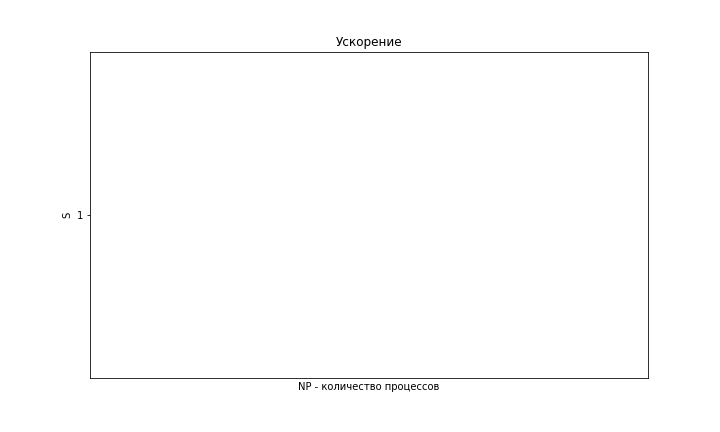

In [8]:
%matplotlib inline
%matplotlib widget
plt.figure(figsize=[10, 6])
plt.title(f"Ускорение")
plt.xlabel("NP - количество процессов")
plt.ylabel("S")
plt.yticks(np.arange(20))
plt.xticks(np.arange(35, 70, 2))

           
for N, df1 in df.groupby("N"):
    dfmean = df1.groupby("NP").mean("Time").sort_values("NP").reset_index()
    plt.plot(dfmean["NP"], dfmean[dfmean["NP"] == 1]["Time"][0] / dfmean["Time"],
             label=f"N={N}")
       
plt.grid()
plt.legend()
# plt.tight_layout()
# plt.ylim(0)
plt.show()

plt.savefig(f"S.jpg")

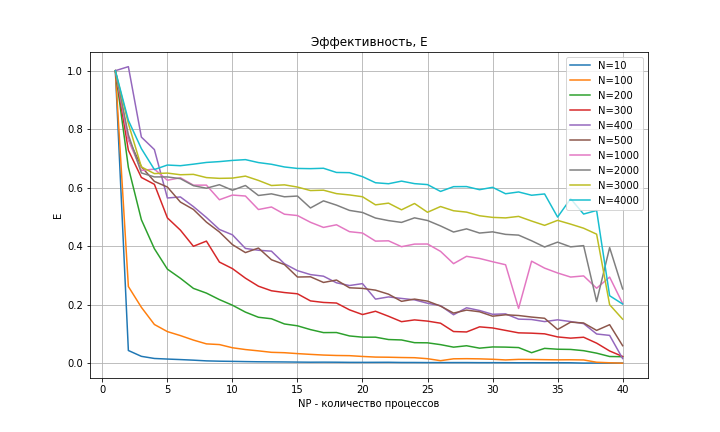

In [ ]:
%matplotlib inline
%matplotlib widget
plt.figure(figsize=[10, 6])
plt.title(f"Эффективность, Е")
plt.xlabel("NP - количество процессов")
plt.ylabel("Е")

for N, df1 in df.groupby("N"):
    dfmean = df1.groupby("NP").mean("Time").sort_values("NP").reset_index()
    plt.plot(dfmean["NP"], dfmean[dfmean["NP"] == 1]["Time"][0] / dfmean["Time"] / dfmean["NP"],
             label=f"N={N}")
       
plt.grid()
plt.legend()
# plt.tight_layout()
# plt.ylim(0)
plt.show()

plt.savefig(f"E.jpg")

In [ ]:
%matplotlib inline
%matplotlib widget
plt.figure(figsize=[10, 6])
plt.title(f"Ускорение")
plt.xlabel("NP - количество процессов")
plt.ylabel("S")
plt.yticks(np.arange(20))
plt.xticks(np.arange(35, 70, 2))

           
for N, df1 in df.groupby("N"):
    dfmean = df1.groupby("NP").mean("Time").sort_values("NP").reset_index()
    plt.plot(dfmean["NP"], dfmean[dfmean["NP"] == 1]["Time"][0] / dfmean["Time"],
             label=f"N={N}")
       
plt.grid()
plt.legend()
# plt.tight_layout()
# plt.ylim(0)
plt.show()